# Loan prediction project

# Problem Statement:-


The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
# basic library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Loan_Data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.duplicated().sum()

0

# for null Value

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.drop('Loan_ID', axis=1, inplace=True)

In [9]:
cols = ['LoanAmount','Loan_Amount_Term','Credit_History','Gender','Married','Self_Employed','Dependents']

for i in cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# To check loan status

In [10]:
def bar_chart(col):
    Approved=data[data["Loan_Status"]=="Y"][col].value_counts()
    Disapproved=data[data["Loan_Status"]=="N"][col].value_counts()
    
    df=pd.DataFrame([Approved,Disapproved])
    df.index=["Approved","Disapproved"]
    df.plot(kind="bar")

    

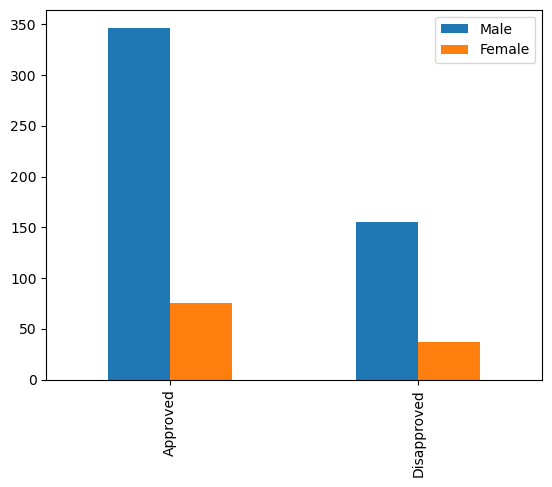

In [11]:
bar_chart("Gender")

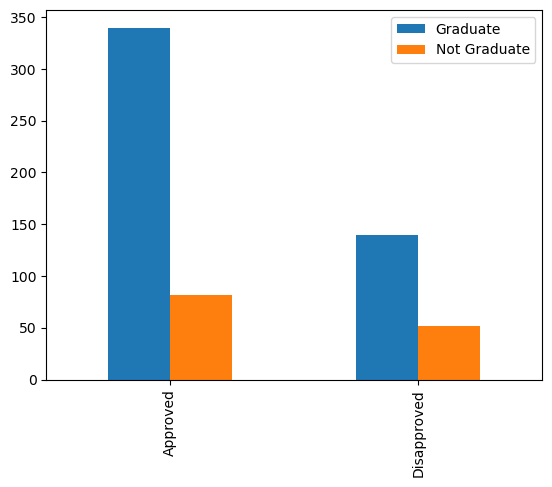

In [12]:
bar_chart("Education")

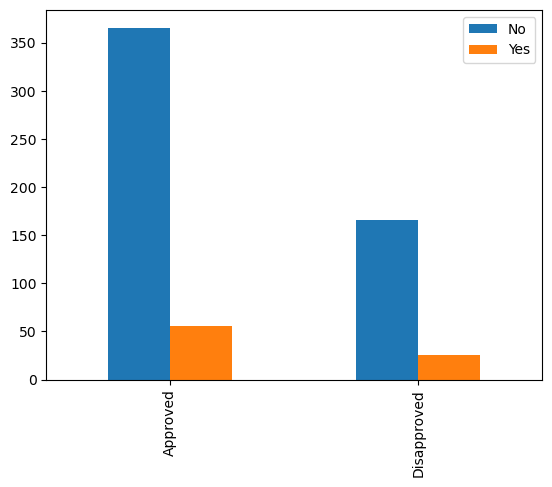

In [13]:
bar_chart("Self_Employed")

In [14]:
data1=data.Gender.replace({"Male":0, "Female":1}, inplace=True)
data1=data.Married.replace({"No":0, "Yes":1}, inplace=True)
data1=data.Education.replace({"Not Graduate":0, "Graduate":1}, inplace=True)
data1=data.Self_Employed.replace({"No":0, "Yes":1}, inplace=True)
data1=data.Property_Area.replace({"Rural":0, "Urban":1, "Semiurban":2}, inplace=True)
data1=data.Loan_Status.replace({"N":0, "Y":1}, inplace=True)
data1

In [15]:
data.shape

(614, 12)

In [16]:
# data analysis 
# correl of the data

<AxesSubplot:title={'center':'Correlation between the Features'}>

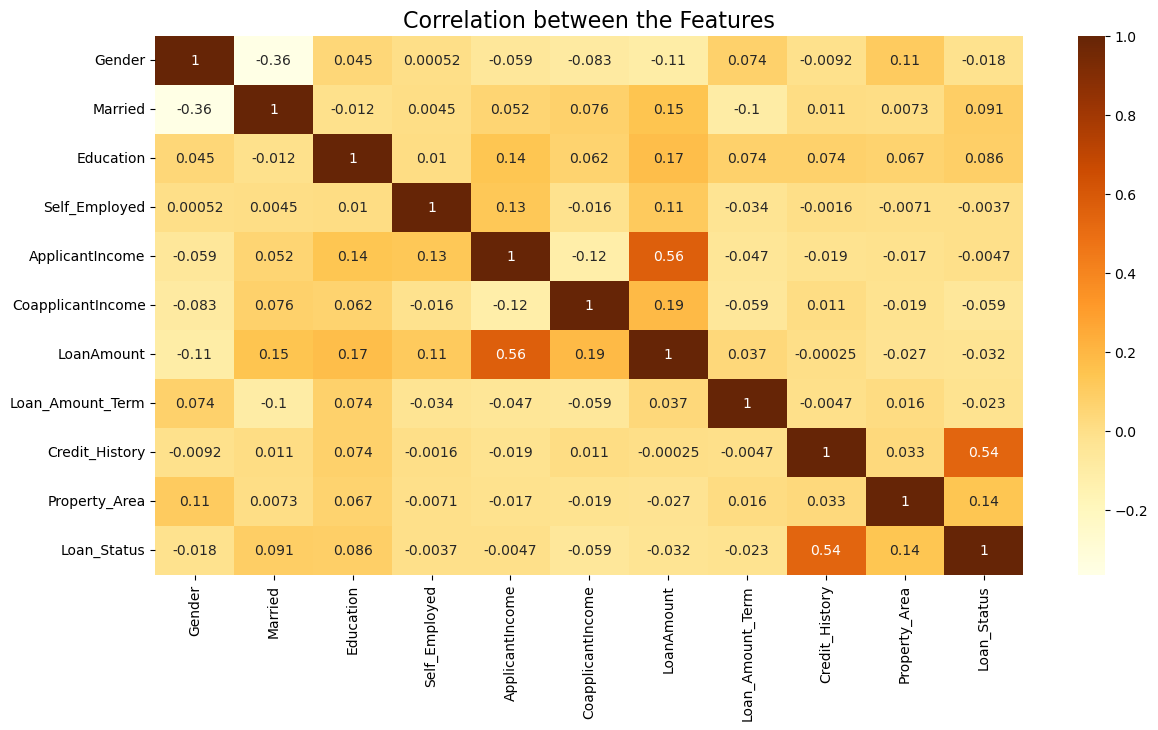

In [17]:
correlation= data.corr()
plt.figure(figsize=(14,7))
plt.title('Correlation between the Features', size = 16)
sns.heatmap(correlation,annot=True,cmap="YlOrBr")

# For Outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

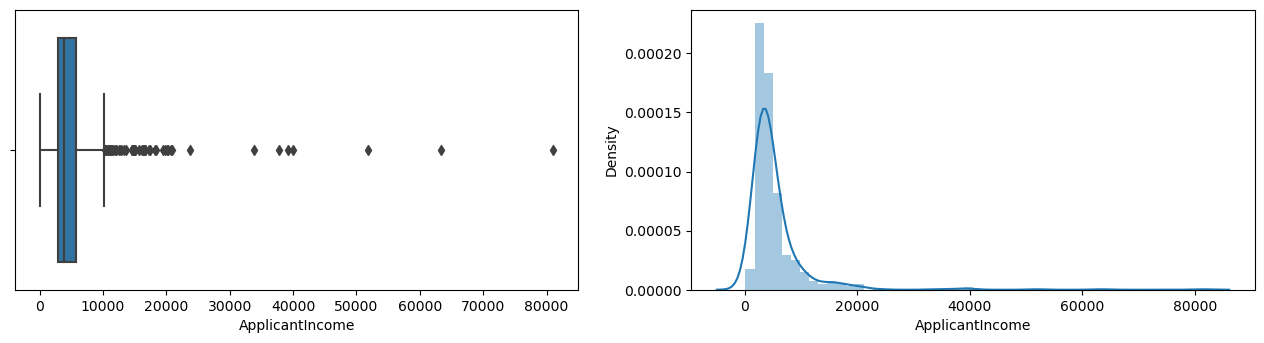

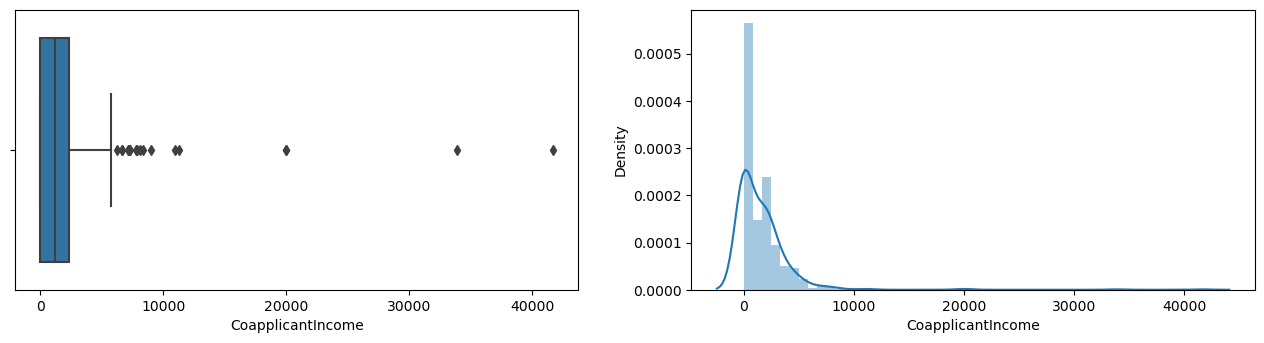

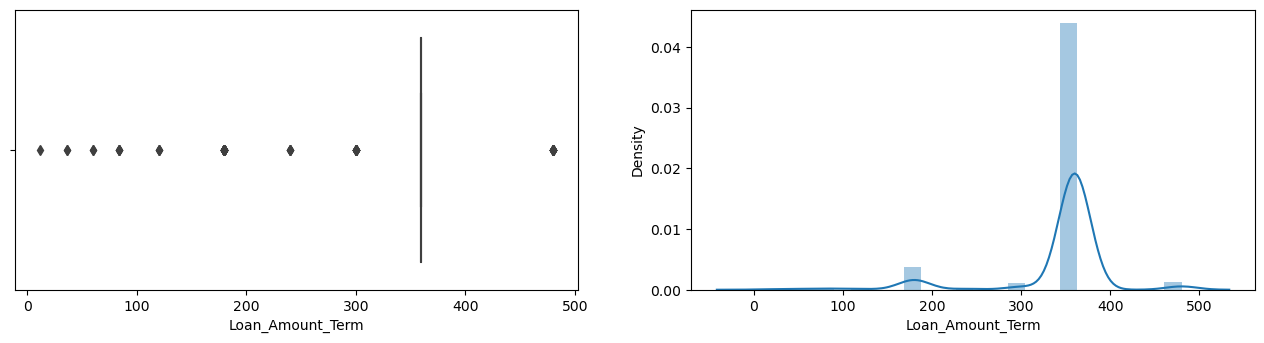

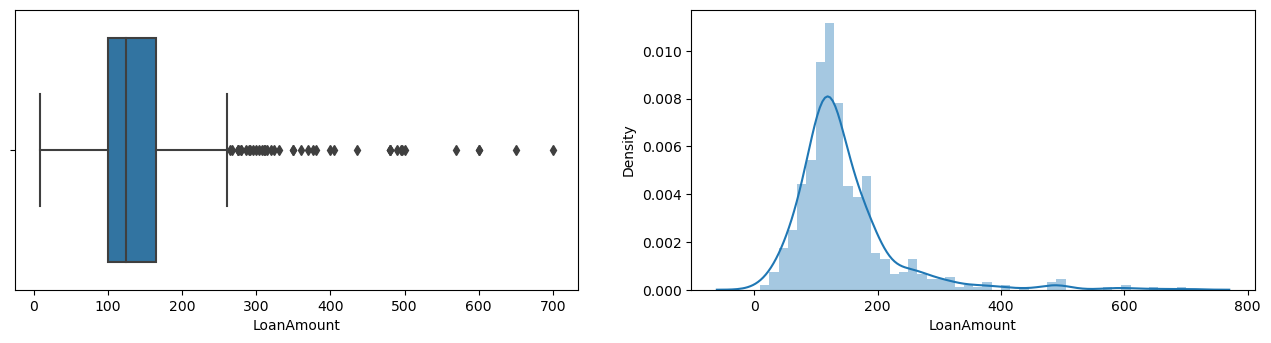

In [18]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'LoanAmount']

for i in cols:
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.boxplot(data[i])
    plt.subplot(2,2,2)
    sns.distplot(data[i])
    

here is some outlier

In [19]:
def outliers_shape(col_name):
    try :
            # Finding the IQR
            percentile25 = data[col_name].quantile(0.25)
            percentile75 = data[col_name].quantile(0.75)
            iqr = percentile75 - percentile25
            
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            
            
            # Finding Outliers
            size = data[data[col_name] > upper_limit]

            print(size.shape)
            
    except Exception as e:
    
        print('error is : ', e)       
            
           

In [20]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(50, 12)
(18, 12)
(41, 12)


In [21]:
# There are 50 rows are outliers, so we cap them instead of removing¶


In [22]:
def cap_outliers (col):
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    data[col] = np.where(
        data[col] > upper_limit,
        upper_limit,
        np.where(
            data[col] < lower_limit,
            lower_limit,
            data[col]
        )
    )

# Remove Outlier

In [23]:
colss = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in colss:
    cap_outliers(i)

In [24]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(0, 12)
(0, 12)
(0, 12)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

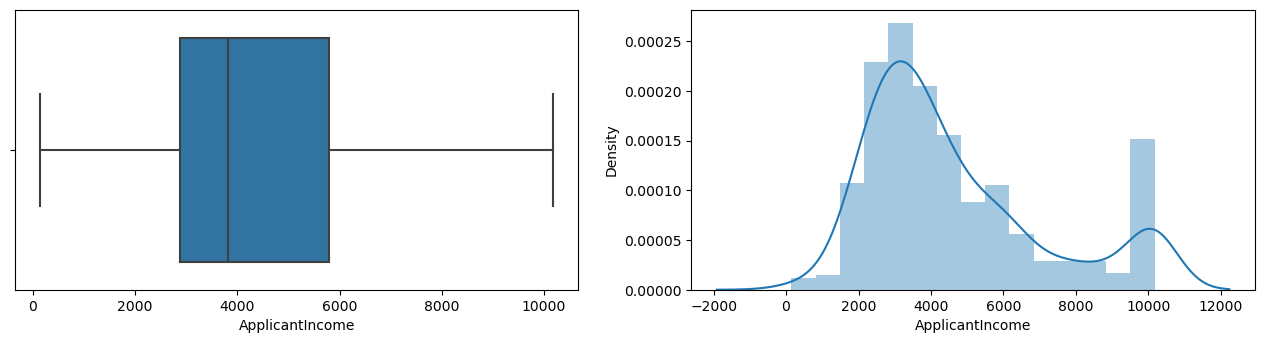

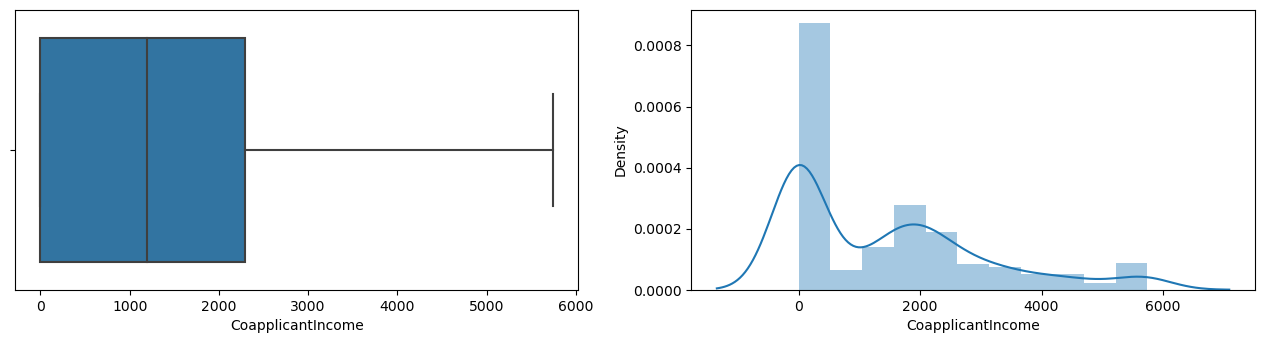

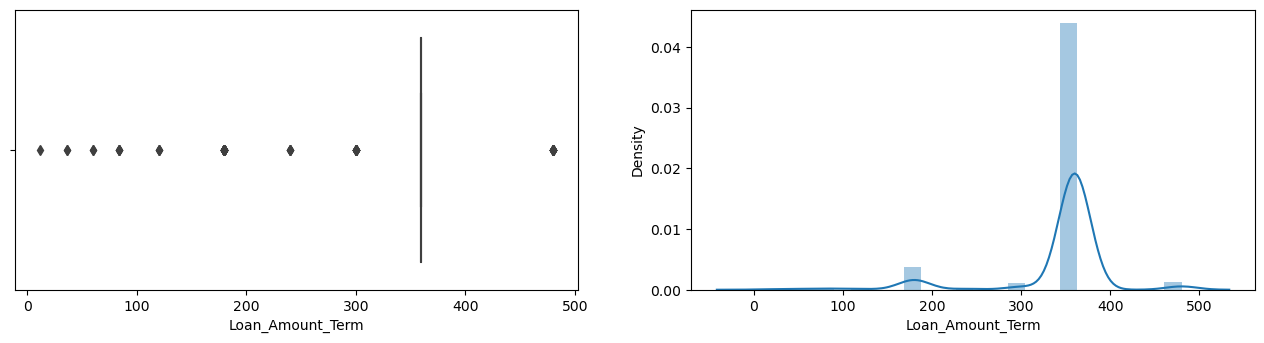

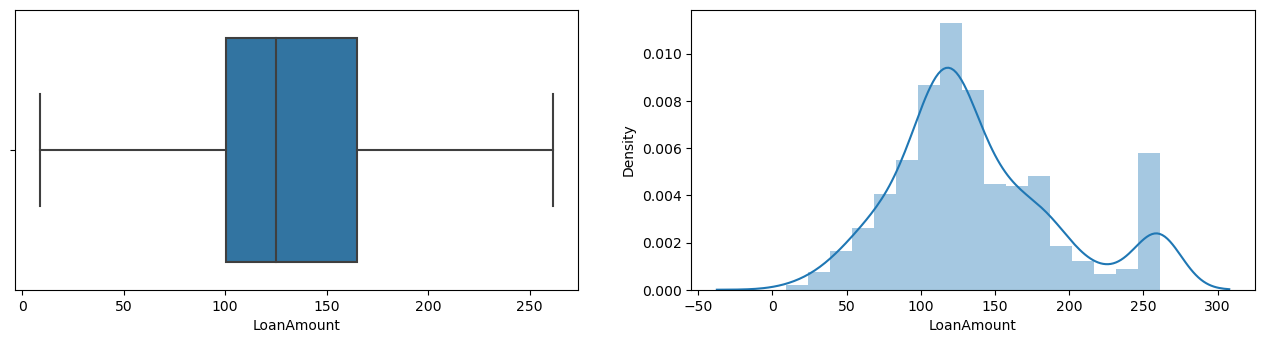

In [25]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'LoanAmount']

for i in cols:
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.boxplot(data[i])
    plt.subplot(2,2,2)
    sns.distplot(data[i])
    

In [26]:
data.drop(columns=['Dependents','Self_Employed'], inplace =True)
data.shape


(614, 10)

In [27]:
data.columns

Index(['Gender', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

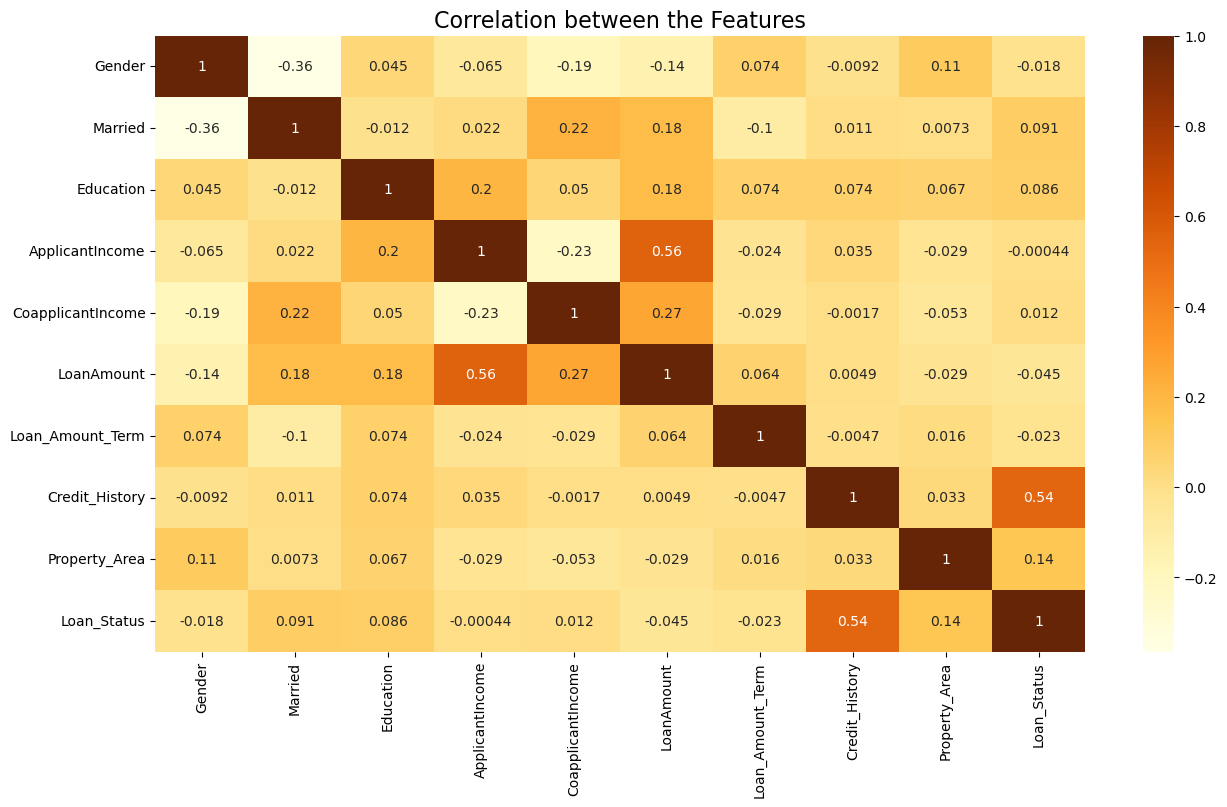

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlOrBr' )
plt.title('Correlation between the Features', size = 16)
plt.show()

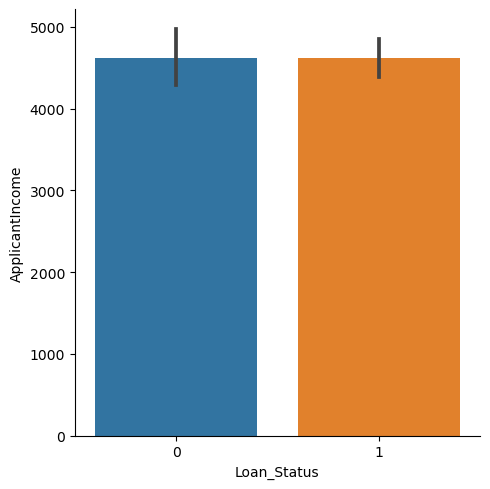

In [29]:
sns.catplot(x = 'Loan_Status', y="ApplicantIncome", kind="bar", data = data)

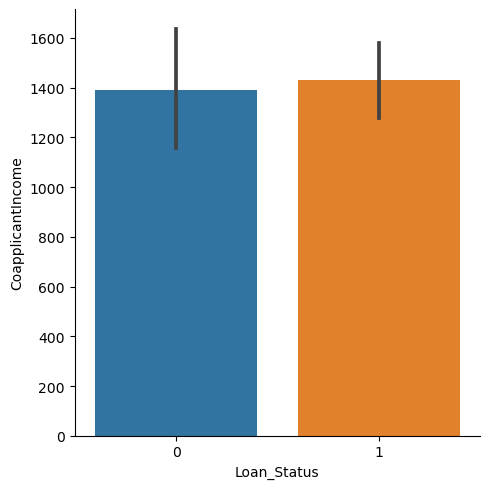

In [30]:
sns.catplot(x = 'Loan_Status', y="CoapplicantIncome", kind="bar", data = data)

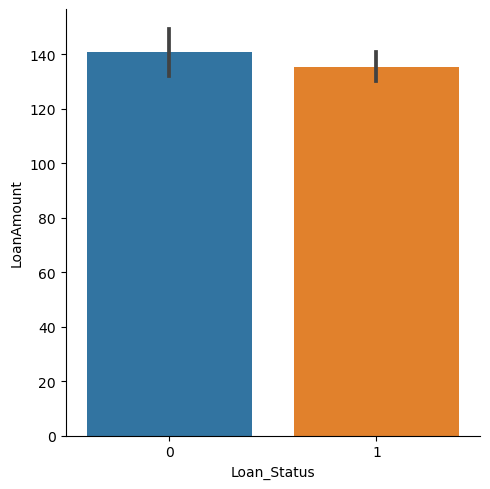

In [31]:
sns.catplot(x = 'Loan_Status', y="LoanAmount", kind="bar", data = data)

# Model building

In [32]:
# import the model library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [33]:
array = data.values
X = array[:,0:9]
Y = array[:,9]
X.shape, Y.shape

((614, 9), (614,))

In [34]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((491, 9), (123, 9), (491,), (123,))

In [35]:
knnc = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state=7)
svc = SVC()
lrc = LogisticRegression()

for c in (rfc, knnc, svc, lrc):
    c.fit(X_train, Y_train)
    Y_pred = c.predict(X_train)
    print("Accuracy of ", c.__class__.__name__, '=', 100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy of  RandomForestClassifier = 97.9633401221996
Accuracy of  KNeighborsClassifier = 78.00407331975559
Accuracy of  SVC = 68.83910386965377
Accuracy of  LogisticRegression = 81.05906313645622


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [36]:
Y_pred = rfc.predict(X_train)
prediction_proba = rfc.predict_proba(X_train)
prediction_proba

array([[0.85714286, 0.14285714],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [0.

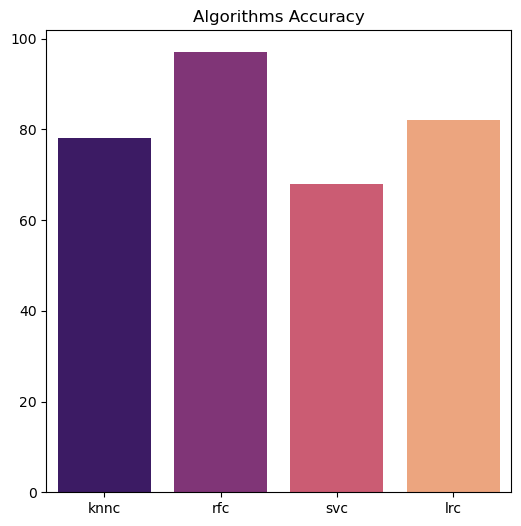

In [37]:
# comparison between Algorithms without hyperparameter tuning 
plt.figure(figsize=(6, 6))
model_name=['knnc','rfc','svc','lrc']
accuracy=[78,97,68,82]

sns.barplot (x=model_name, y=accuracy,palette='magma')
plt.title('Algorithms Accuracy')
plt.show()


# Conclusion

We can see that we have numeric variables and some categorical variables, our database is not very big, which makes our work a little difficult.


When we look at our database we can see that we have some null values, some we can handle and others we can't, when we analyze the business for example, we have the Credit History variable, and this variable has some null values, if we fill in these null values we may have a very high risk in the business, so we chose to use the base omitting the null values ​​of the credit history variable, the other null values ​​were treated.
When we look at the correlation part, we see that we do not have a strong correlation between our variables, in the exploratory analysis the variable that most caught our attention was the credit history variable, when there is no credit history we have practically an automatic refusal.


Here we simply define four best model to check best accuracy, here we define the model is Accuracy of  RandomForestClassifier = 97.9633401221996,
Accuracy of  KNeighborsClassifier = 78.00407331975559,
Accuracy of  SVC = 68.83910386965377,
Accuracy of  LogisticRegression = 81.05906313645622, but Random forest classifier give the best accuracy i.e. = 97%.